In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuração do estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

# Função para carregar dados
def load_data(base_path):
    folders = ['Original', 'Code Smells', 'Refatorado']
    all_data = []
    
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        if not os.path.exists(folder_path):
            print(f"Aviso: Pasta '{folder}' não encontrada")
            continue
            
        files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
        for file in files:
            df = pd.read_csv(os.path.join(folder_path, file))
            df['version'] = folder
            df['file_group'] = file.split('.')[0]
            all_data.append(df)
    
    if not all_data:
        raise ValueError("Nenhum dado válido encontrado nas pastas")
    
    return pd.concat(all_data, ignore_index=True)

# Visualização 1: Distribuição do MI por versão e geral
def plot_mi_distributions(data):
    # Configuração da figura
    plt.figure(figsize=(18, 12))
    
    # Definir limites fixos entre 0 e 100
    mi_min = 0
    mi_max = 100
    binwidth = 5
    
    # Subplot 1: Distribuição Geral
    plt.subplot(2, 2, 1)
    sns.histplot(data['MI'], bins=np.arange(mi_min, mi_max, binwidth), kde=True, color='purple')
    plt.axvline(65, color='red', linestyle='--', label='Limite Baixo (65)')
    plt.axvline(85, color='green', linestyle='--', label='Limite Alto (85)')
    plt.title('Distribuição Geral do Maintainability Index', fontsize=14)
    plt.xlabel('MI')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlim(mi_min, mi_max)
    
    # Subplot 2: Original
    plt.subplot(2, 2, 2)
    sns.histplot(data[data['version'] == 'Original']['MI'], 
                 bins=np.arange(mi_min, mi_max, binwidth), kde=True, color='blue')
    plt.axvline(65, color='red', linestyle='--')
    plt.axvline(85, color='green', linestyle='--')
    plt.title('Distribuição do MI - Versão Original', fontsize=14)
    plt.xlabel('MI')
    plt.ylabel('Frequência')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlim(mi_min, mi_max)
    
    # Subplot 3: Code Smells
    plt.subplot(2, 2, 3)
    sns.histplot(data[data['version'] == 'Code Smells']['MI'], 
                 bins=np.arange(mi_min, mi_max, binwidth), kde=True, color='orange')
    plt.axvline(65, color='red', linestyle='--')
    plt.axvline(85, color='green', linestyle='--')
    plt.title('Distribuição do MI - Versão com Code Smells', fontsize=14)
    plt.xlabel('MI')
    plt.ylabel('Frequência')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlim(mi_min, mi_max)
    
    # Subplot 4: Refatorado
    plt.subplot(2, 2, 4)
    sns.histplot(data[data['version'] == 'Refatorado']['MI'], 
                 bins=np.arange(mi_min, mi_max, binwidth), kde=True, color='green')
    plt.axvline(65, color='red', linestyle='--')
    plt.axvline(85, color='green', linestyle='--')
    plt.title('Distribuição do MI - Versão Refatorada', fontsize=14)
    plt.xlabel('MI')
    plt.ylabel('Frequência')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlim(mi_min, mi_max)
    
    plt.tight_layout()
    plt.show()

# Visualização 2: Boxplot comparativo
def plot_mi_boxplot(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='version', y='MI', data=data, order=['Original', 'Code Smells', 'Refatorado'],
                palette=['blue', 'orange', 'green'])
    
    plt.axhline(65, color='red', linestyle='--', label='Limite Baixo (65)')
    plt.axhline(85, color='green', linestyle='--', label='Limite Alto (85)')
    plt.title('Comparação do Maintainability Index entre Versões', fontsize=14)
    plt.xlabel('Versão')
    plt.ylabel('Maintainability Index (MI)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.ylim(0, 100)  # Limite do eixo Y entre 0 e 100
    plt.show()

# Visualização 3: Relação entre Complexidade e Maintainability
def plot_complexity_maintainability(data):
    plt.figure(figsize=(12, 7))
    
    # Criar scatter plot
    scatter = sns.scatterplot(
        data=data, 
        x='CC_Total', 
        y='MI', 
        hue='version',
        style='version',
        size='LOC',
        sizes=(30, 200),
        alpha=0.8,
        palette={'Original':'blue', 'Code Smells':'orange', 'Refatorado':'green'},
        edgecolor='w',
        linewidth=0.5
    )
    
    # Linhas de referência
    plt.axhline(65, color='red', linestyle=':', alpha=0.5)
    plt.axhline(85, color='green', linestyle=':', alpha=0.5)
    
    # Ajustes estéticos
    plt.title('Relação entre Complexidade Ciclomática e Maintainability Index', fontsize=14)
    plt.xlabel('Complexidade Ciclomática Total (CC_Total)', fontsize=12)
    plt.ylabel('Maintainability Index (MI)', fontsize=12)
    plt.ylim(0, 100)  # Limite do eixo Y entre 0 e 100
    
    # Melhorar a legenda
    plt.legend(
        title='Versão',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Função principal
def main_analysis(folder_path):
    try:
        # Carregar dados
        data = load_data(folder_path)
        
        # Análise 1: Distribuições de MI
        print("\n[1] Distribuição do Maintainability Index por Versão")
        plot_mi_distributions(data)
        
        # Análise 2: Boxplot comparativo
        print("\n[2] Comparação do MI entre Versões (Boxplot)")
        plot_mi_boxplot(data)
        
        # Análise 3: Relação Complexidade-Maintainability
        print("\n[3] Relação entre Complexidade e Maintainability")
        plot_complexity_maintainability(data)
        
        return data
        
    except Exception as e:
        print(f"Erro: {str(e)}")
        return None


[1] Distribuição do Maintainability Index por Versão


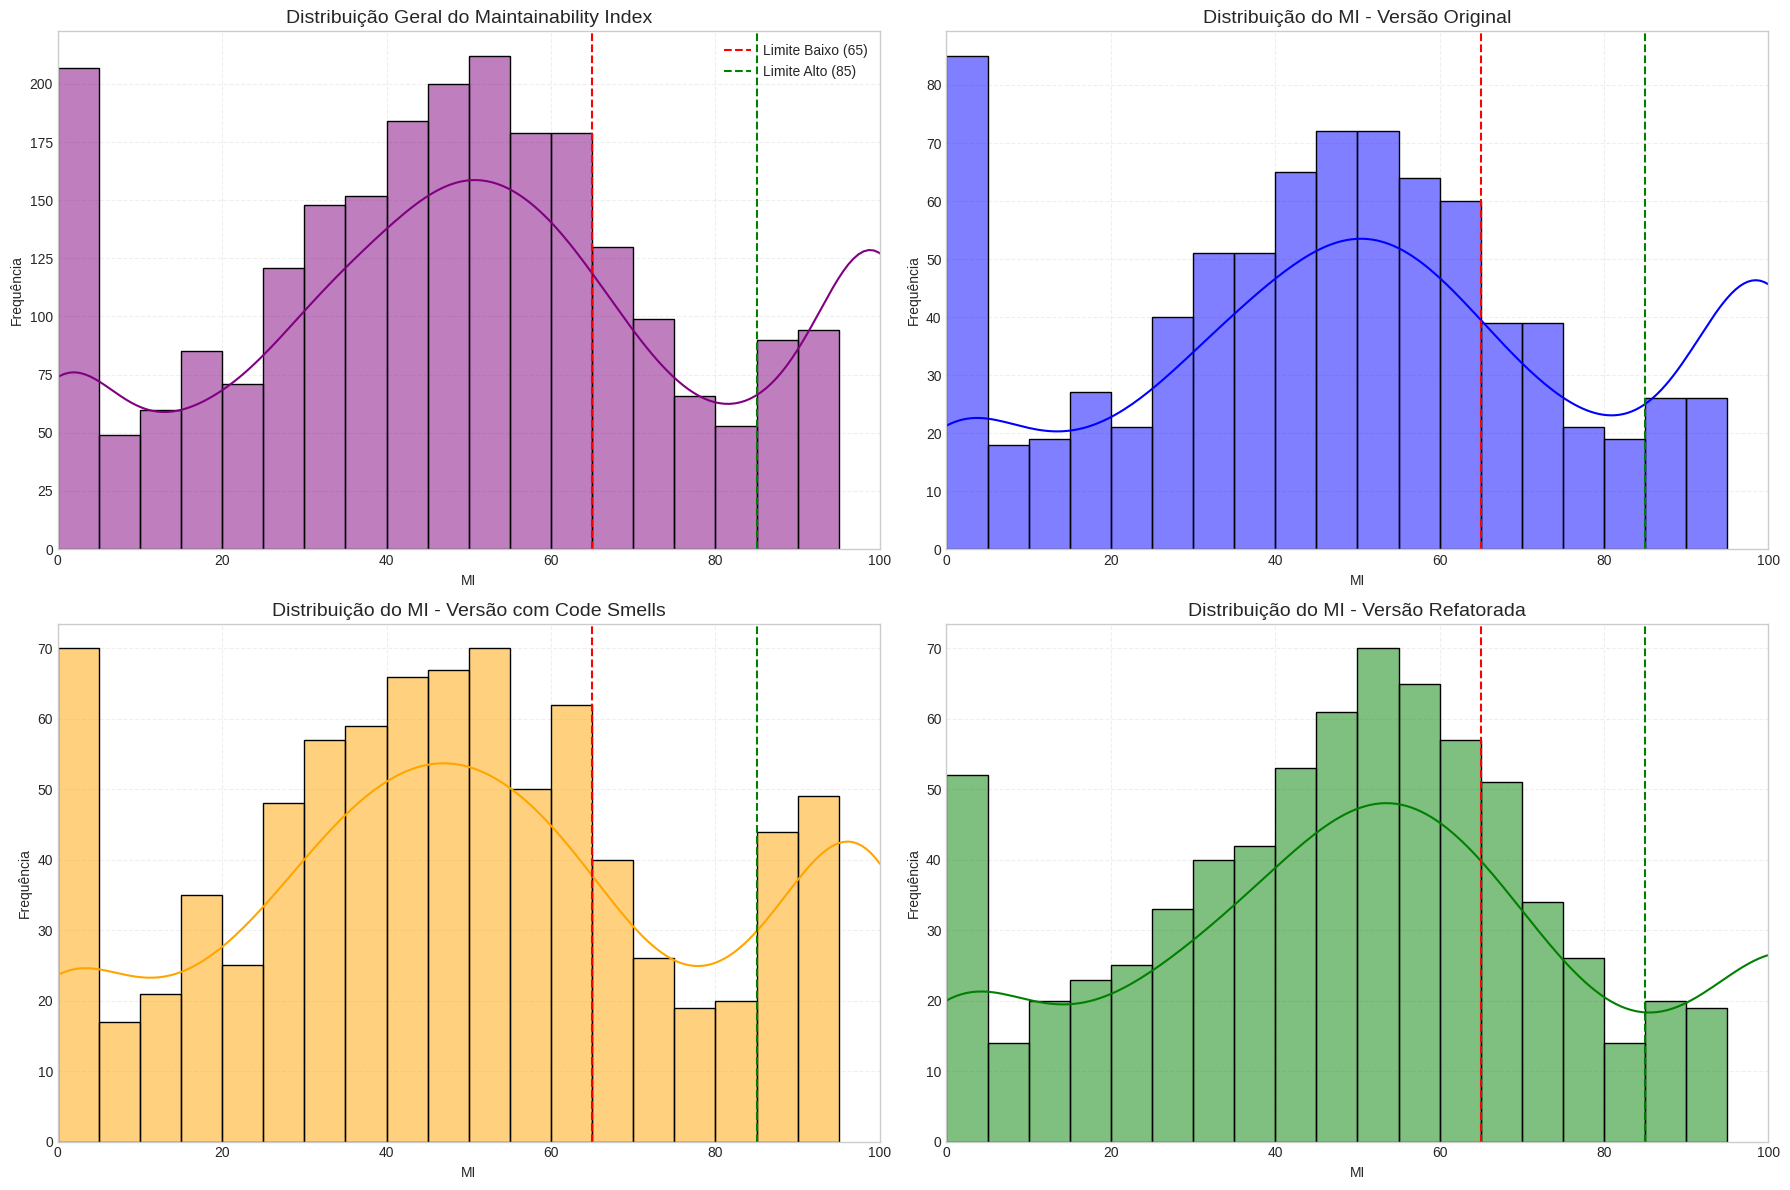


[2] Comparação do MI entre Versões (Boxplot)


/tmp/ipykernel_13757/2409549464.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='version', y='MI', data=data, order=['Original', 'Code Smells', 'Refatorado'],


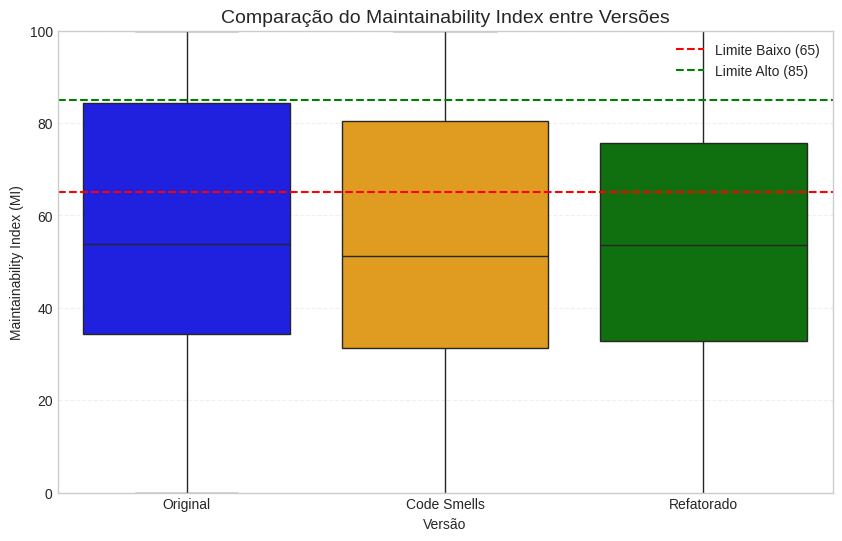


[3] Relação entre Complexidade e Maintainability


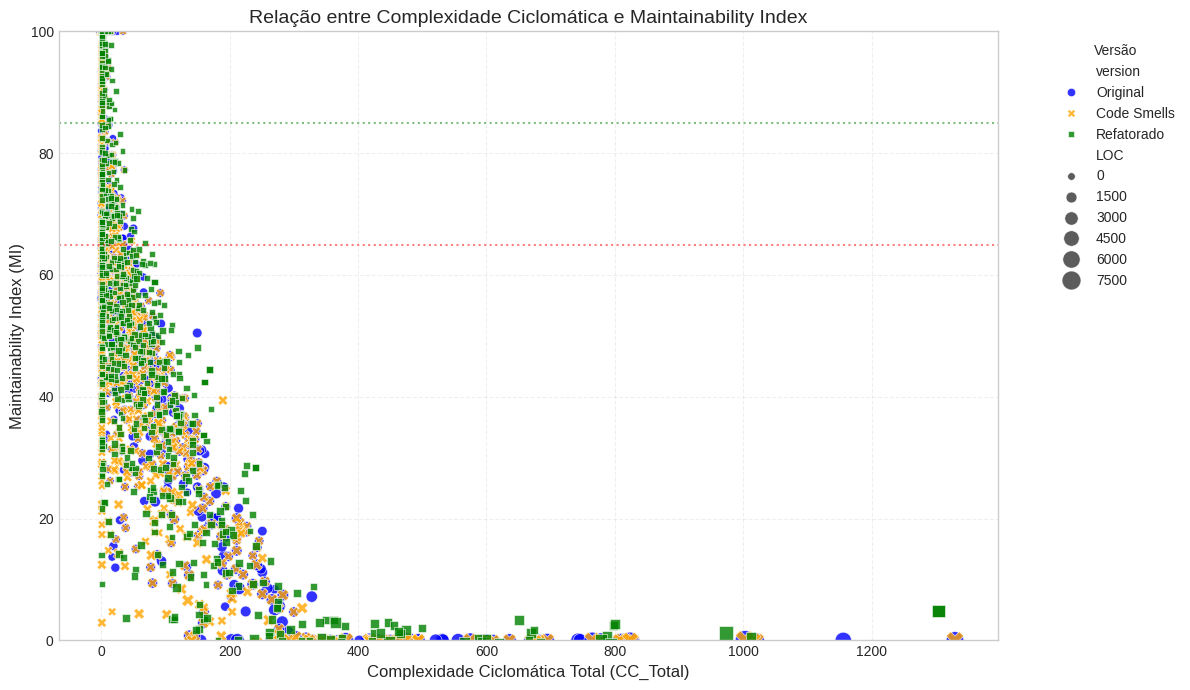


Análise concluída com sucesso!

Estatísticas descritivas do MI:
count    2935.000000
mean       54.416772
std        31.469307
min        -9.889139
25%        32.841503
50%        52.865356
75%        79.688366
max       114.988643
Name: MI, dtype: float64


In [5]:
folder_path =  "./metrics"
    
if os.path.exists(folder_path):
    data = main_analysis(folder_path)
    if data is not None:
        print("\nAnálise concluída com sucesso!")
        print("\nEstatísticas descritivas do MI:")
        print(data['MI'].describe())
else:
    print("Caminho inválido. Por favor, verifique o diretório fornecido.")